# W12 - Exercise

use the dataset __healthcare_dataset__ for this exercise

Column details: <br>
- **Name**: This column represents the name of the patient associated with the healthcare record. <br>
- **Age**: The age of the patient at the time of admission, expressed in years. <br>
- **Gender**: Indicates the gender of the patient, either "Male" or "Female."<br>
- **Blood** Type: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).<br>
- **Medical** Condition: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.<br>
- **Date of Admission**: The date on which the patient was admitted to the healthcare facility.<br>
- **Doctor**: The name of the doctor responsible for the patient's care during their admission.<br>
- **Hospital**: Identifies the healthcare facility or hospital where the patient was admitted.<br>
- **Insurance Provider**: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."<br>
- **Billing Amount**: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.<br>
- **Room Number**: The room number where the patient was accommodated during their admission.<br>
- **Admission Type**: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.<br>
- **Discharge Date**: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.<br>
- **Medication**: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."<br>
- **Test Results**: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.<br>

This exercise is applicable to multiple machine learning algorithms. Create EDA to visualize data and results and explore as far as you can.
Task:
1. Data Cleaning, Transformation
2. Visualization (EDA)
3. Use at least one machine learning techniques (Regression, Classification, Clustering)
4. Use different modelling algorithm to compare results (XGBoost, KNN, Hierarchical, Apriori, Linear, Logistic, etc)

This exercise is to test your willingness to explore, critical thinking and the knowledge when to use what algorithms to achieve a purpose. 

**1. Data Cleaning and Transformation**

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import AgglomerativeClustering
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
healthcare_df = pd.read_csv('healthcare_dataset.csv')

# Check for missing values
print(healthcare_df.isnull().sum())

# Drop irrelevant columns
healthcare_df = healthcare_df.drop(['Name', 'Date of Admission', 'Doctor', 'Hospital', 'Room Number', 'Discharge Date'], axis=1)

# Handle missing values
healthcare_df['Age'].fillna(healthcare_df['Age'].median(), inplace=True)
healthcare_df['Blood Type'].fillna('Unknown', inplace=True)
healthcare_df['Insurance Provider'].fillna('Unknown', inplace=True)
healthcare_df['Medication'].fillna('Not Prescribed', inplace=True)
healthcare_df['Test Results'].fillna('Not Conducted', inplace=True)

# Convert categorical variables to numerical using Label Encoding
label_encoder = LabelEncoder()
healthcare_df['Gender'] = label_encoder.fit_transform(healthcare_df['Gender'])
healthcare_df['Blood Type'] = label_encoder.fit_transform(healthcare_df['Blood Type'])
healthcare_df['Medical Condition'] = label_encoder.fit_transform(healthcare_df['Medical Condition'])
healthcare_df['Insurance Provider'] = label_encoder.fit_transform(healthcare_df['Insurance Provider'])
healthcare_df['Admission Type'] = label_encoder.fit_transform(healthcare_df['Admission Type'])
healthcare_df['Medication'] = label_encoder.fit_transform(healthcare_df['Medication'])
healthcare_df['Test Results'] = label_encoder.fit_transform(healthcare_df['Test Results'])

# Check the cleaned and transformed data
healthcare_df.head()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results
0,81,0,7,3,3,37490.983364,0,0,1
1,35,1,6,1,4,47304.064845,1,2,2
2,61,1,5,5,3,36874.896997,1,2,2
3,49,1,5,1,3,23303.322092,2,4,0
4,51,1,7,0,4,18086.344184,2,3,2


**2. Visualization (EDA)**

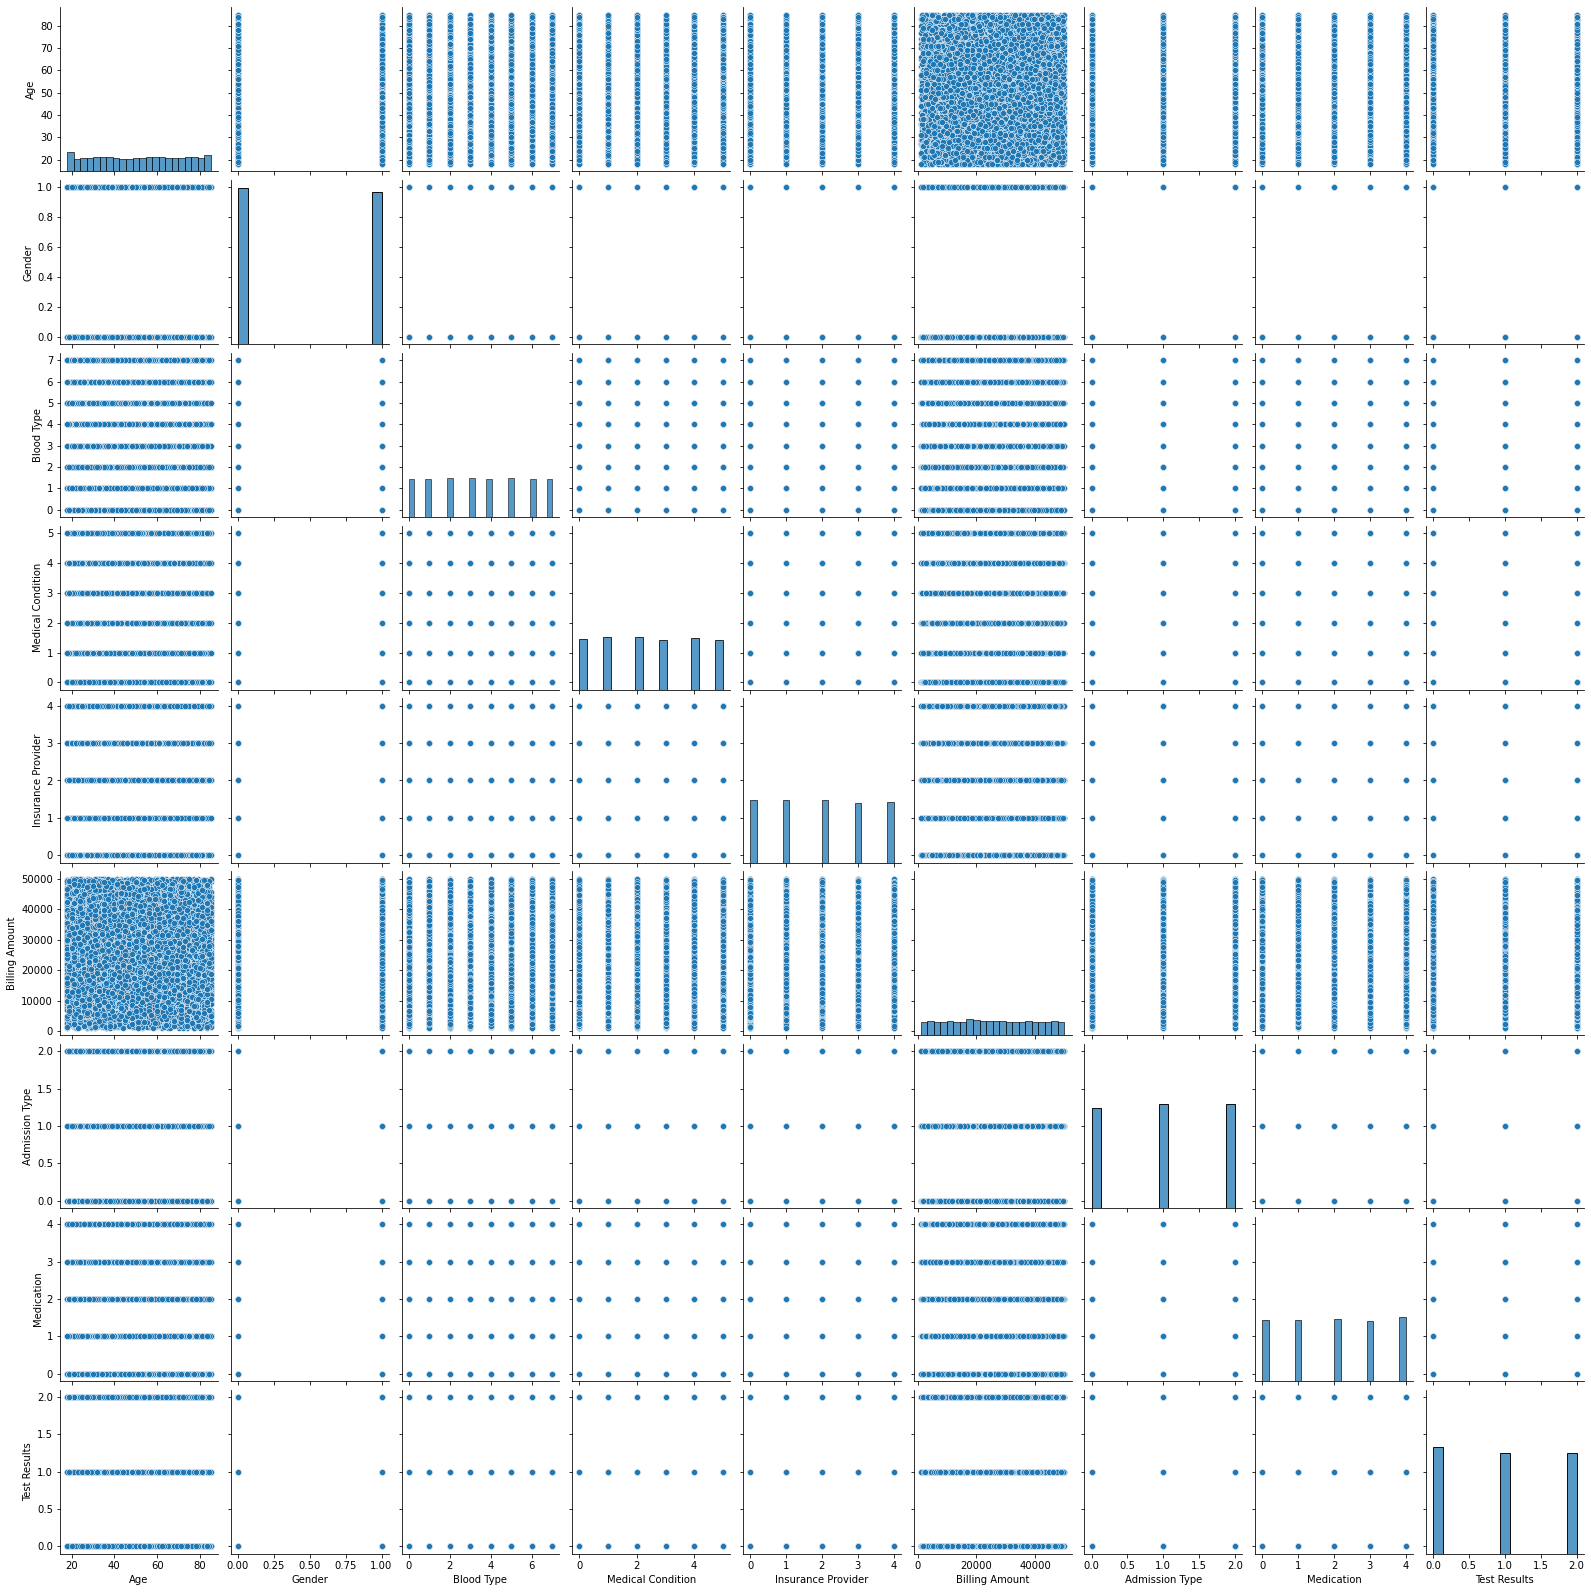

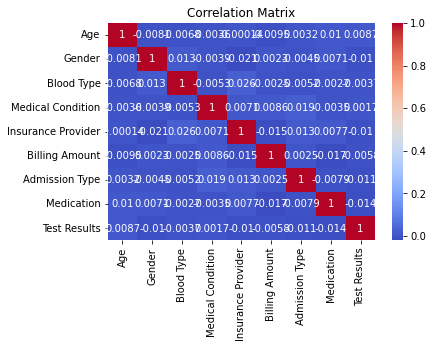

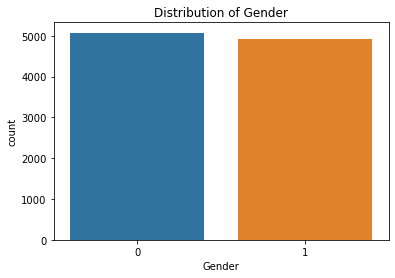

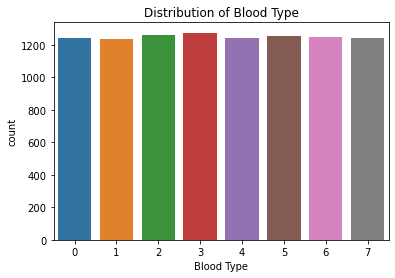

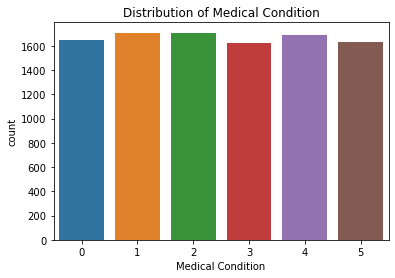

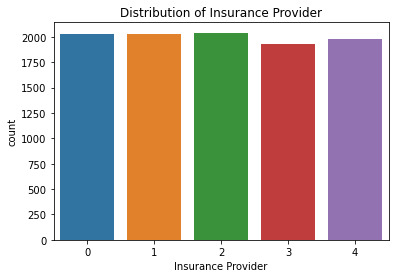

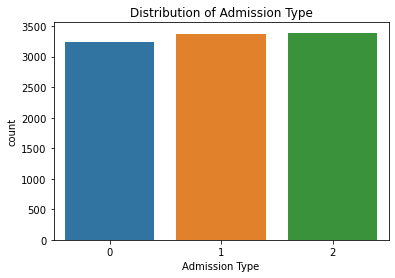

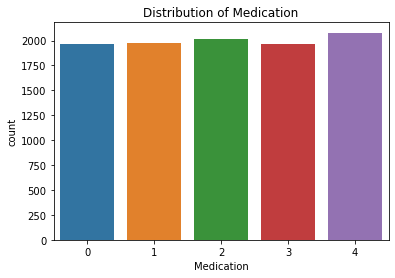

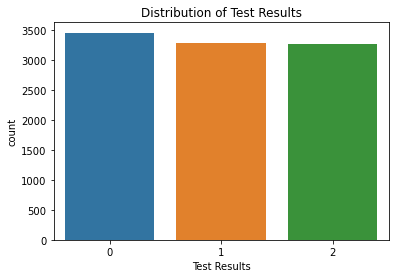

In [13]:
sns.pairplot(healthcare_df)
plt.show()

# Correlation matrix
correlation_matrix = healthcare_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Visualize the distribution of categorical features
categorical_columns = ['Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider', 'Admission Type', 'Medication', 'Test Results']
for column in categorical_columns:
    sns.countplot(x=column, data=healthcare_df)
    plt.title(f'Distribution of {column}')
    plt.show()

**3. Machine Learning (Regression)**

In [14]:
# Split the data into features (X) and target variable (y)
X_reg = healthcare_df.drop('Billing Amount', axis=1)
y_reg = healthcare_df['Billing Amount']

# Split the data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_reg, y_train_reg)
y_pred_linear = linear_reg.predict(X_test_reg)

# K-Nearest Neighbors Regression
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train_reg, y_train_reg)
y_pred_knn_reg = knn_reg.predict(X_test_reg)

# Print regression metrics
print("Linear Regression:")
print("Mean Squared Error:", mean_squared_error(y_test_reg, y_pred_linear))
print("R-squared:", r2_score(y_test_reg, y_pred_linear))

print("\nK-Nearest Neighbors Regression:")
print("Mean Squared Error:", mean_squared_error(y_test_reg, y_pred_knn_reg))
print("R-squared:", r2_score(y_test_reg, y_pred_knn_reg))

Linear Regression:
Mean Squared Error: 200043691.85633087
R-squared: -0.0008044847303760871

K-Nearest Neighbors Regression:
Mean Squared Error: 239590688.9863399
R-squared: -0.19865532280507736


Conclusion: The Linear Regression model is more accurate than KNN for the Billing Amount category

**4. Clustering (Hierarchical Clustering)**

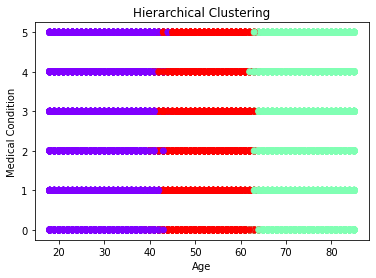

In [15]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=3)
clusters = hierarchical_cluster.fit_predict(X)

# Visualize clusters
plt.scatter(X['Age'], X['Medical Condition'], c=clusters, cmap='rainbow')
plt.title('Hierarchical Clustering')
plt.xlabel('Age')
plt.ylabel('Medical Condition')
plt.show()

Conclusion: For all types of medical conditions, by using hierarchical clustering, the most accurate model is to divide the age group into 3 on average (20-40), (40-60), (60-80)